In [1]:
# options

model_path = r"models/38_model.h5"
data_path = r"data/data_10.csv"
show_top_x_results = 10

In [2]:
# imports

import random

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [3]:
# constant values

WORD_COLUMN = "word"

In [4]:
# helper methods
def one_hot_encoding_label(labels):
    code = np.array(labels)
    encoder = LabelEncoder()
    return encoder.fit_transform(code)

In [5]:
# read data
df = pd.read_csv(data_path)
words = df[WORD_COLUMN].unique()
labels = df[WORD_COLUMN].to_numpy()
data = df.drop(columns=[WORD_COLUMN]).to_numpy()
del df

In [6]:
# load model
model = load_model(model_path)

In [23]:
# get random sample from the data
num = random.randint(0, len(data))
sub = data[num:num+1]
actual_result = labels[num:num+1][0]

In [24]:
# predict
predictions = model.predict(sub)

In [25]:
# process results
for i in range(len(predictions)):
    results = dict(zip(predictions[i], words))

top_results = []
for i in range(show_top_x_results):
    top = max(results)
    top_results.append((results.pop(top), top))

1. wine glass - 98.45% probability
2. asparagus - 1.05% probability
3. hurricane - 0.43% probability
4. foot - 0.03% probability
5. shark - 0.03% probability
6. skull - 0.0% probability
7. couch - 0.0% probability
8. school bus - 0.0% probability
9. lipstick - 0.0% probability
10. vase - 0.0% probability
actual results: wine glass


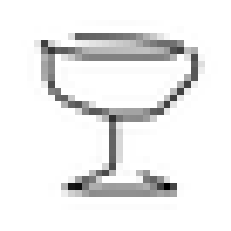

In [26]:
# print results
for index, (item, probability) in enumerate(top_results):
    print(f"{index+1}. {item} - {round(probability * 100, 2)}% probability")
print(f"actual results: {actual_result}")
plt.axis('off')
plt.imshow(sub[0].reshape(32,32,), cmap='gray', origin='lower')